# **Tugas Text Rank & Page Rank**
---

> ##  TextRank
TextRank adalah algoritma peringkat berbasis grafik untuk memproses teks. TextRank menghasilkan ekstraksi kalimat sebagai ringkasan. Salah satu kelebihan dari algoritma ini, tidak diperlukannya pelatihan menggunakan data training pada algoritma yang digunakan. (sumber : https://www.neliti.com/publications/237552/penerapan-algoritma-textrank-untuk-automatic-summarization-pada-dokumen-berbahas#:~:text=TextRank%20adalah%20algoritma%20peringkat%20berbasis,training%20pada%20algoritma%20yang%20digunakan.)

> ## PageRank
Algoritma PageRank atau algoritma Google diperkenalkan oleh Lary Page, salah satu pendiri Google. Ini pertama kali digunakan untuk menentukan peringkat halaman web di mesin pencari Google. Saat ini, semakin banyak digunakan di berbagai bidang, misalnya dalam peringkat pengguna di media sosial dll. Yang menarik dengan algoritma PageRank adalah bagaimana memulai dari masalah yang kompleks dan berakhir dengan solusi yang sangat sederhana. (sumber : https://towardsdatascience.com/pagerank-algorithm-fully-explained-dc794184b4af)

## **Dokumen Berita**
Untuk dokumen berita yang digunakan diambil dari website liputan 6 dengan link seperti berikut 
https://www.liputan6.com/news/read/5093558/ini-jadwal-sidang-ferdy-sambo-cs-terkait-kasus-kematian-brigadir-j

kemudian dijadikan file .pdf dengan nama DokumenBerita.pdf

### **Proses Parsing Dokumen Menjadi Beberapa Kalimat**
Pada tugas ini data awal berupa dokumen yang akan di parsing atau di pecah menjadi beberapa kalimat. 

### **Proses Ekstraksi Dokumen Menjadi Teks**
berikut ini merupakan library yang digunakan untuk mengekstrak dokumen format .pdf
> #### Library yang digunakan
**Library PyPDF2** 
adalah library PDF python murni gratis dan open-source yang mampu memisahkan, menggabungkan, memotong, dan mengubah halaman file PDF. Itu juga dapat menambahkan data khusus, opsi tampilan, dan kata sandi ke file PDF. PyPDF2 juga dapat mengambil teks dan metadata dari PDF. (sumber : https://pypi.org/project/PyPDF2/) <br>
**Library Doc2txt** 
adalah library Python yang fokus mengekstrak teks berkualitas tinggi yang dengan memperbaiki kesalahan sebanyak mungkin. doc2text juga secara drastis meningkatkan ekstraksi teks dari gambar dengan memperbaiki resolusi, area teks (pangkas), dan kemiringan.
(sumber : https://pypi.org/project/doc2text/)

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys

Membuka file .pdf

In [ ]:
pdfFileObj = open('DokumenBerita.pdf', 'rb')

In [ ]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()

Hasil ekstraksi teks dari dokumen .pdf

In [ ]:
document

'Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . \nLiputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal \npersidangan untuk  Ferdy Sambo  Cs. Sidang pidana umum ini diketahui terkait dengan \nkematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.  \nHumas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap \npara tersangka ini nantinya dilakukan dengan waktu yang berbeda -beda. Baik \nkasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).  \nDiketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas \nkematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 \nOktober 2022. Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan \nberencana dan  Obstruction of Justice  (OJ) . \nMereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri \nCandrawathi, Bripka Ricky Rizal, Bharada Richard Elieze

## **Proses Parsing Teks Menjadi Kalimat**

> ### Library yang digunakan
**Library nltk.tokenize.punkt** 
Punkt Sentence Tokenizer adalah library python yang berfungsi membagi teks menjadi daftar kalimat dengan menggunakan algoritma yang tidak diawasi untuk membangun model untuk kata-kata singkatan, kolokasi, dan kata-kata yang memulai kalimat. Itu harus dilatih pada banyak koleksi plaintext dalam bahasa target sebelum dapat digunakan.(sumber : https://www.nltk.org/api/nltk.tokenize.punkt.html) <br>

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
def tokenize(document):
    # Kita memecahnya menggunakan  PunktSentenceTokenizer
    # 
    doc_tokenizer = PunktSentenceTokenizer()
    
    # metode tokenize() memanggil dokument kita
    # sebagai input dan menghasilkan daftar kalimat dalam dokumen
    
    # sentences_list adalah daftar masing masing kalimat dari dokumen yang ada.
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

Hasil dari parsing teks menjadi beberapa kalimat

In [ ]:
sentences_list = tokenize(document)
for i in sentences_list:
    print('------        ------')
    print(i)

------        ------
Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . 
Liputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal 
persidangan untuk  Ferdy Sambo  Cs.
------        ------
Sidang pidana umum ini diketahui terkait dengan 
kematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.
------        ------
Humas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap 
para tersangka ini nantinya dilakukan dengan waktu yang berbeda -beda.
------        ------
Baik 
kasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).
------        ------
Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas 
kematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 
Oktober 2022.
------        ------
Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan 
berencana dan  Obstruction of Justice  (OJ) .
------        ------
Merek

In [ ]:
print ("Banyaknya kalimat = ", (len(sentences_list)))
sentences_list

Banyaknya kalimat =  8


['Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . \nLiputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal \npersidangan untuk  Ferdy Sambo  Cs.',
 'Sidang pidana umum ini diketahui terkait dengan \nkematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.',
 'Humas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap \npara tersangka ini nantinya dilakukan dengan waktu yang berbeda -beda.',
 'Baik \nkasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).',
 'Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas \nkematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 \nOktober 2022.',
 'Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan \nberencana dan  Obstruction of Justice  (OJ) .',
 'Mereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri \nCandrawathi, Bripka Ricky Rizal, Bhara

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#Menghitung frekuensi kata dalam dokumen
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)
print(cv_matrix)

  (0, 44)	1
  (0, 46)	2
  (0, 102)	1
  (0, 39)	2
  (0, 99)	2
  (0, 27)	2
  (0, 105)	1
  (0, 50)	1
  (0, 53)	1
  (0, 21)	1
  (0, 60)	1
  (0, 26)	1
  (0, 47)	2
  (0, 82)	1
  (0, 71)	1
  (0, 101)	1
  (0, 87)	1
  (0, 48)	1
  (0, 103)	1
  (0, 65)	1
  (0, 85)	1
  (0, 109)	1
  (1, 44)	1
  (1, 102)	1
  (1, 105)	1
  :	:
  (7, 59)	1
  (7, 11)	1
  (7, 66)	1
  (7, 40)	1
  (7, 84)	1
  (7, 98)	1
  (7, 20)	1
  (7, 22)	1
  (7, 41)	1
  (7, 58)	1
  (7, 55)	1
  (7, 4)	1
  (7, 73)	1
  (7, 5)	1
  (7, 8)	1
  (7, 93)	1
  (7, 9)	1
  (7, 56)	2
  (7, 25)	1
  (7, 89)	1
  (7, 13)	1
  (7, 111)	1
  (7, 6)	1
  (7, 45)	1
  (7, 112)	1


In [ ]:
print ("Banyaknya kosa kata = ", len((cv.get_feature_names_out())))

Banyaknya kosa kata =  116


In [ ]:
print ("kosa kata = ", (cv.get_feature_names_out()))

kosa kata =  ['11' '2022' 'adapun' 'agung' 'agus' 'akbp' 'akp' 'alias' 'arif' 'arifin'
 'atas' 'atau' 'baik' 'baiquni' 'bareskrim' 'beda' 'belasan' 'berbeda'
 'berencana' 'bharada' 'bo' 'brigadir' 'brigjen' 'bripka' 'candrawathi'
 'chuck' 'com' 'cs' 'dalam' 'dan' 'dap' 'dari' 'dengan' 'dibagi'
 'diketahui' 'dilakukan' 'djumyanto' 'dua' 'elieze' 'ferdy' 'halangi'
 'hendra' 'humas' 'hutabarat' 'ini' 'irfan' 'jadwal' 'jakarta' 'jaksel'
 'justice' 'kasus' 'ke' 'kejaksaan' 'kematian' 'kluster' 'kombes' 'kompol'
 'kuat' 'kurniawan' 'lain' 'liputan6' 'ma' 'masuk' 'maupun' 'mengatakan'
 'mengatur' 'menghalang' 'menjadi' 'menye' 'mereka' 'nantinya' 'negeri'
 'nofryansyah' 'nurpatria' 'obstruction' 'of' 'oj' 'oktober' 'orang'
 'pada' 'para' 'pembunuhan' 'pengadilan' 'penyidik' 'penyidikan'
 'persidangan' 'pidana' 'pn' 'polri' 'putranto' 'putri' 'rabu' 'rahkan'
 'rahman' 'richard' 'ricky' 'rizal' 'ruf' 'sam' 'sambo' 'sebanyak'
 'selatan' 'sidang' 'telah' 'terha' 'terkait' 'tersangka' 'tersebut'
 

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
print(normal_matrix.T.toarray)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.13494728 0.         0.
  0.         0.         0.18659937 0.37319875 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.26989457 0.         0.
  0.         0.         0.13494728 0.         0.37319875 0.31276968
  0.18659937 0.         0.15638484 0.         0.         0.13494728
  0.         0.         0.         0.         0.         0.
  0.18659937 0.         0.         0.         0.         0.18659937
  0.         0.         0.         0.         0.         0.15638484
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.15638484 0.
  0.         0.18659937 0.         0.18659937 0.         0.
  0.         0.         0.         0.         0.         0.
  0.    

In [ ]:
normal_matrix.shape

(8, 116)

In [ ]:
import networkx as nx

In [ ]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph.toarray())

[[1.         0.1737279  0.23473447 0.05341811 0.07038405 0.
  0.10619992 0.03388312]
 [0.1737279  1.         0.13930525 0.         0.32761184 0.
  0.         0.        ]
 [0.23473447 0.13930525 1.         0.         0.02698316 0.
  0.03900681 0.02171212]
 [0.05341811 0.         0.         1.         0.         0.39718193
  0.0990056  0.111013  ]
 [0.07038405 0.32761184 0.02698316 0.         1.         0.04451181
  0.         0.01958705]
 [0.         0.         0.         0.39718193 0.04451181 1.
  0.17839017 0.16002027]
 [0.10619992 0.         0.03900681 0.0990056  0.         0.17839017
  1.         0.0843365 ]
 [0.03388312 0.         0.02171212 0.111013   0.01958705 0.16002027
  0.0843365  1.        ]]


In [ ]:
print(res_graph)

  (0, 7)	0.033883116821244785
  (0, 3)	0.05341811280769133
  (0, 6)	0.10619992206232533
  (0, 4)	0.07038404963845986
  (0, 1)	0.17372789999043323
  (0, 2)	0.23473447212134768
  (0, 0)	0.9999999999999999
  (1, 2)	0.1393052505653802
  (1, 0)	0.17372789999043323
  (1, 4)	0.32761184463517334
  (1, 1)	0.9999999999999992
  (2, 1)	0.1393052505653802
  (2, 7)	0.02171212494394941
  (2, 4)	0.026983164456506885
  (2, 0)	0.23473447212134768
  (2, 6)	0.03900681475729844
  (2, 2)	1.0000000000000002
  (3, 0)	0.05341811280769133
  (3, 7)	0.11101300469097919
  (3, 6)	0.09900560089828983
  (3, 5)	0.3971819263386378
  (3, 3)	1.0
  (4, 5)	0.04451181460944157
  (4, 0)	0.07038404963845986
  (4, 7)	0.019587046886994974
  (4, 2)	0.026983164456506885
  (4, 4)	1.0000000000000002
  (4, 1)	0.32761184463517334
  (5, 4)	0.04451181460944157
  (5, 3)	0.3971819263386378
  (5, 7)	0.1600202727348439
  (5, 6)	0.1783901726437644
  (5, 5)	1.0000000000000002
  (6, 3)	0.09900560089828983
  (6, 0)	0.10619992206232533
  (6, 7)

In [ ]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

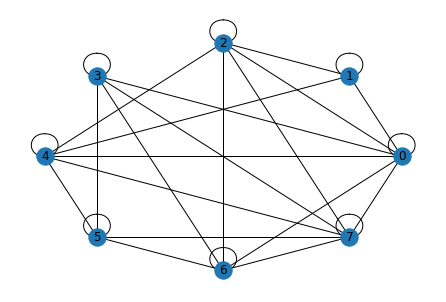

In [ ]:
nx.draw_circular(nx_graph,with_labels=True)

In [ ]:
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))
print('Banyaknya node {}'.format(nx_graph.number_of_nodes()))

Banyaknya sisi 27
Banyaknya node 8


In [ ]:
import scipy
A=scipy.sparse.csr_matrix.toarray(normal_matrix)

In [ ]:
cv_matrix

<8x116 sparse matrix of type '<class 'numpy.int64'>'
	with 162 stored elements in Compressed Sparse Row format>

In [ ]:
print(sentences_list[1])

Sidang pidana umum ini diketahui terkait dengan 
kematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.


In [ ]:
ranks = nx.pagerank(nx_graph)
for i in ranks:
    print(i, ranks[i])

0 0.13116781831094287
1 0.12951793040181
2 0.11886055287258798
3 0.12795815367758823
4 0.12007346381249615
5 0.13583713031500844
6 0.12022649645096849
7 0.1163584541585979


In [ ]:
ranked_sentences = sorted(((ranks[i],s) for i,s in enumerate(sentences_list)), reverse=True)
ranked_sentences

[(0.13583713031500844,
  'Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan \nberencana dan  Obstruction of Justice  (OJ) .'),
 (0.13116781831094287,
  'Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . \nLiputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal \npersidangan untuk  Ferdy Sambo  Cs.'),
 (0.12951793040181,
  'Sidang pidana umum ini diketahui terkait dengan \nkematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.'),
 (0.12795815367758823,
  'Baik \nkasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).'),
 (0.12022649645096849,
  'Mereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri \nCandrawathi, Bripka Ricky Rizal, Bharada Richard Elieze dan Kuat Ma’ruf.'),
 (0.12007346381249615,
  'Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas \nkematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu

In [ ]:
# Extract top 10 sentences as the summary
for i in range(7):
  print(i)
  print(ranked_sentences[i][1])

0
Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan 
berencana dan  Obstruction of Justice  (OJ) .
1
Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . 
Liputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal 
persidangan untuk  Ferdy Sambo  Cs.
2
Sidang pidana umum ini diketahui terkait dengan 
kematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.
3
Baik 
kasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).
4
Mereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri 
Candrawathi, Bripka Ricky Rizal, Bharada Richard Elieze dan Kuat Ma’ruf.
5
Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas 
kematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 
Oktober 2022.
6
Humas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap 
para tersangka ini nantinya dilakukan dengan waktu yang b